Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [6]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: >

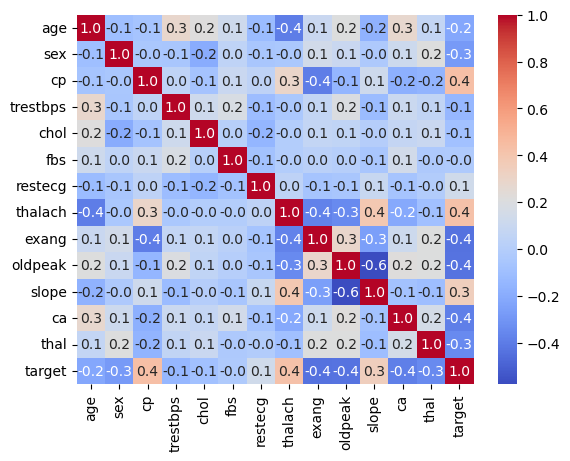

In [14]:
sns.heatmap(df.corr(),annot = True,fmt = ".1f",cmap="coolwarm")

In [16]:
#Function for scaling the data
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)    
    return X_train_scaled, X_test_scaled

Observation:
There are no missing values and no categorical values
We Implemented Standard Scaling to the numercal columns

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [19]:
#Dependent and Independent Features
X = df.drop(labels=["target"],axis=1)
y = df.target

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [23]:
X_train.shape , X_test.shape

((212, 13), (91, 13))

In [25]:
y_train.shape , y_test.shape

((212,), (91,))

In [27]:
# Calling the Standard Scaler function
X_train ,X_test = scaler_standard(X_train,X_test)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [29]:
rfc =RandomForestClassifier(n_estimators=100,max_depth=10)

In [31]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [33]:
y_pred = rfc.predict(X_test)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [35]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"Recall : {recall_score(y_test,y_pred)}")
print(f"F1 Score : {f1_score(y_test,y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test,y_pred)} ")

Accuracy : 0.8241758241758241
Precision : 0.8269230769230769
Recall : 0.86
F1 Score : 0.8431372549019608

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91
 


Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [37]:
feature_importances = rfc.feature_importances_
feature_importances

array([0.08984541, 0.029907  , 0.11594337, 0.07042629, 0.07293005,
       0.0147512 , 0.01863451, 0.10664456, 0.08432645, 0.09555677,
       0.04907277, 0.13955522, 0.11240639])

In [39]:
feature_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]

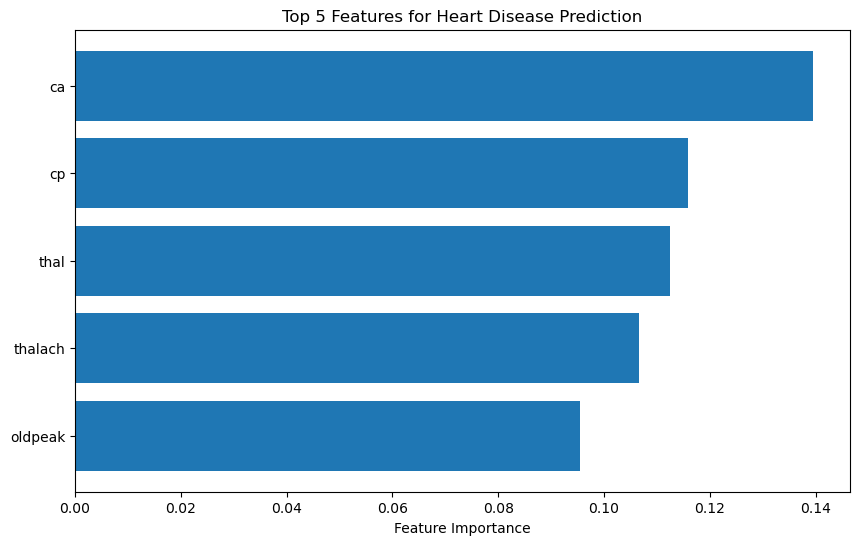

In [41]:
# Sort feature importances in descending order and get the top 5 features
top_features = sorted(zip(feature_importances, feature_names),reverse=True)[:5]
top_importances, top_feature_names = zip(*top_features)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), top_importances, align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 5 Features for Heart Disease Prediction')
plt.gca().invert_yaxis() # Invert the y-axis to show the most important feature at the top
plt.show()

In [43]:
top_importances, top_feature_names

((0.13955521802279233,
  0.11594337437218113,
  0.11240639208453468,
  0.10664455932601037,
  0.09555677261370349),
 ('ca', 'cp', 'thal', 'thalach', 'oldpeak'))

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [46]:
params = {
    "n_estimators" : [100,200,300,400,500,1000] ,
    "max_depth" : [3,5,7,9,10,15,None],
    "min_samples_split" : [2,4,6,8,10],
    "min_samples_leaf" : [1,2,3,4,5]
}

In [48]:
clf = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5,verbose=3,scoring='accuracy',refit=True)


In [50]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.690 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.907 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.714 total time=   0.1s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 10, 15, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400, 500, 1000]},
             scoring='accuracy', verbose=3)

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [52]:
clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [54]:
clf.best_score_

0.8488372093023255

In [56]:
model = RandomForestClassifier(**clf.best_params_)

In [58]:
model.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, min_samples_split=6)

In [60]:
y_pred = model.predict(X_test)

In [62]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"Recall : {recall_score(y_test,y_pred)}")
print(f"F1 Score : {f1_score(y_test,y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test,y_pred)} ")

Accuracy : 0.8461538461538461
Precision : 0.8333333333333334
Recall : 0.9
F1 Score : 0.8653846153846154

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91
 


Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [64]:
# Using the top 2 features which have high feature importance
X = df[["ca","cp"]] 
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

modell = RandomForestClassifier(**clf.best_params_)

modell.fit(X_train,y_train)

y_pred = modell.predict(X_test)

C:\Users\ajays\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


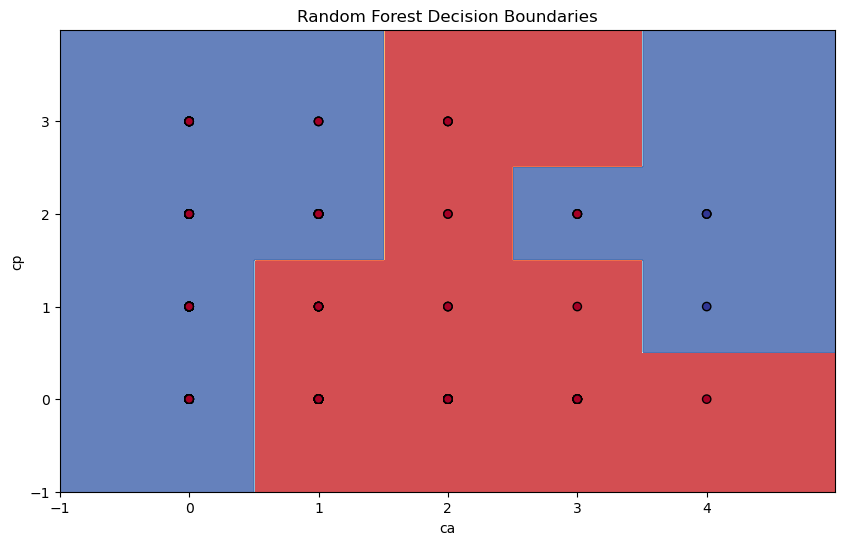

Accuracy: 0.768976897689769


In [66]:
# Plot the decision boundaries
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Use the trained model to predict classes for each point in the mesh grid
Z = modell.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the scatter plot with decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')

plt.xlabel("ca")
plt.ylabel("cp")
plt.title("Random Forest Decision Boundaries")
plt.show()

# Evaluate the model's accuracy
y_pred = modell.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")